In [1]:
# from https://nextjournal.com/gkoehler/pytorch-mnist

In [1]:
import torch
import torchvision

In [15]:
n_epochs = 10
batch_size_train = 1000
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 1

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [16]:
#Makes Train & Test data set
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  #Dropout
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        #Convolutional Layer/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) 
        #Convolutional Layer/Dropout/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        #Fully Connected Layer/Activation
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities. 
        return F.log_softmax(x, dim=1)

In [19]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [20]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs+1)]

In [21]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), '/results/model.pth')
            #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [22]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [23]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

C:\Users\pli6894\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3316, Accuracy: 1137/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.345348
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.352634
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.342667
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.338256
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.330323
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.325202
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.335884
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.316394
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.318127
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.322156
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.309714
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.303674
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.310961
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.306022
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.305056
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.302761
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.299080
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.291515
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.293934
Train Epoch

Train Epoch: 3 [41000/60000 (68%)]	Loss: 1.398848
Train Epoch: 3 [42000/60000 (70%)]	Loss: 1.422527
Train Epoch: 3 [43000/60000 (72%)]	Loss: 1.407525
Train Epoch: 3 [44000/60000 (73%)]	Loss: 1.358191
Train Epoch: 3 [45000/60000 (75%)]	Loss: 1.334724
Train Epoch: 3 [46000/60000 (77%)]	Loss: 1.391779
Train Epoch: 3 [47000/60000 (78%)]	Loss: 1.292787
Train Epoch: 3 [48000/60000 (80%)]	Loss: 1.342624
Train Epoch: 3 [49000/60000 (82%)]	Loss: 1.332114
Train Epoch: 3 [50000/60000 (83%)]	Loss: 1.370897
Train Epoch: 3 [51000/60000 (85%)]	Loss: 1.321436
Train Epoch: 3 [52000/60000 (87%)]	Loss: 1.327854
Train Epoch: 3 [53000/60000 (88%)]	Loss: 1.323862
Train Epoch: 3 [54000/60000 (90%)]	Loss: 1.270376
Train Epoch: 3 [55000/60000 (92%)]	Loss: 1.293220
Train Epoch: 3 [56000/60000 (93%)]	Loss: 1.237430
Train Epoch: 3 [57000/60000 (95%)]	Loss: 1.243260
Train Epoch: 3 [58000/60000 (97%)]	Loss: 1.193199
Train Epoch: 3 [59000/60000 (98%)]	Loss: 1.291793

Test set: Avg. loss: 0.8579, Accuracy: 8152/10000

Train Epoch: 6 [22000/60000 (37%)]	Loss: 0.750948
Train Epoch: 6 [23000/60000 (38%)]	Loss: 0.731035
Train Epoch: 6 [24000/60000 (40%)]	Loss: 0.820895
Train Epoch: 6 [25000/60000 (42%)]	Loss: 0.795601
Train Epoch: 6 [26000/60000 (43%)]	Loss: 0.733222
Train Epoch: 6 [27000/60000 (45%)]	Loss: 0.748221
Train Epoch: 6 [28000/60000 (47%)]	Loss: 0.822270
Train Epoch: 6 [29000/60000 (48%)]	Loss: 0.696019
Train Epoch: 6 [30000/60000 (50%)]	Loss: 0.802267
Train Epoch: 6 [31000/60000 (52%)]	Loss: 0.764353
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.676139
Train Epoch: 6 [33000/60000 (55%)]	Loss: 0.705811
Train Epoch: 6 [34000/60000 (57%)]	Loss: 0.735171
Train Epoch: 6 [35000/60000 (58%)]	Loss: 0.747613
Train Epoch: 6 [36000/60000 (60%)]	Loss: 0.808977
Train Epoch: 6 [37000/60000 (62%)]	Loss: 0.763416
Train Epoch: 6 [38000/60000 (63%)]	Loss: 0.714286
Train Epoch: 6 [39000/60000 (65%)]	Loss: 0.794743
Train Epoch: 6 [40000/60000 (67%)]	Loss: 0.710530
Train Epoch: 6 [41000/60000 (68%)]	Loss: 0.771322


Train Epoch: 9 [3000/60000 (5%)]	Loss: 0.624551
Train Epoch: 9 [4000/60000 (7%)]	Loss: 0.611396
Train Epoch: 9 [5000/60000 (8%)]	Loss: 0.625208
Train Epoch: 9 [6000/60000 (10%)]	Loss: 0.574428
Train Epoch: 9 [7000/60000 (12%)]	Loss: 0.651605
Train Epoch: 9 [8000/60000 (13%)]	Loss: 0.537624
Train Epoch: 9 [9000/60000 (15%)]	Loss: 0.627601
Train Epoch: 9 [10000/60000 (17%)]	Loss: 0.596804
Train Epoch: 9 [11000/60000 (18%)]	Loss: 0.635121
Train Epoch: 9 [12000/60000 (20%)]	Loss: 0.605281
Train Epoch: 9 [13000/60000 (22%)]	Loss: 0.618356
Train Epoch: 9 [14000/60000 (23%)]	Loss: 0.559198
Train Epoch: 9 [15000/60000 (25%)]	Loss: 0.630130
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.642749
Train Epoch: 9 [17000/60000 (28%)]	Loss: 0.610767
Train Epoch: 9 [18000/60000 (30%)]	Loss: 0.598444
Train Epoch: 9 [19000/60000 (32%)]	Loss: 0.559390
Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.565741
Train Epoch: 9 [21000/60000 (35%)]	Loss: 0.681993
Train Epoch: 9 [22000/60000 (37%)]	Loss: 0.641449
Train Epoc

In [24]:
len(test_counter)

11

In [25]:
len(test_losses)

11

Text(0,0.5,'negative log likelihood loss')

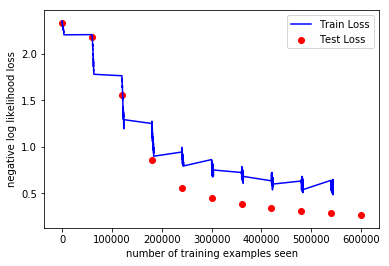

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
#fig